### Analyzing Nativity

One way to measure immigration with ACS data is to analyze [B05012: Nativity in the United States](https://censusreporter.org/data/table/?table=B05012&geo_ids=97000US3612510&primary_geo_id=97000US3612510).

...   Total  Native  Foreign-Born  Year
0  44953   31623         13330  2009
0  45249   30096         15153  2014
0  45044   30755         14289  2019


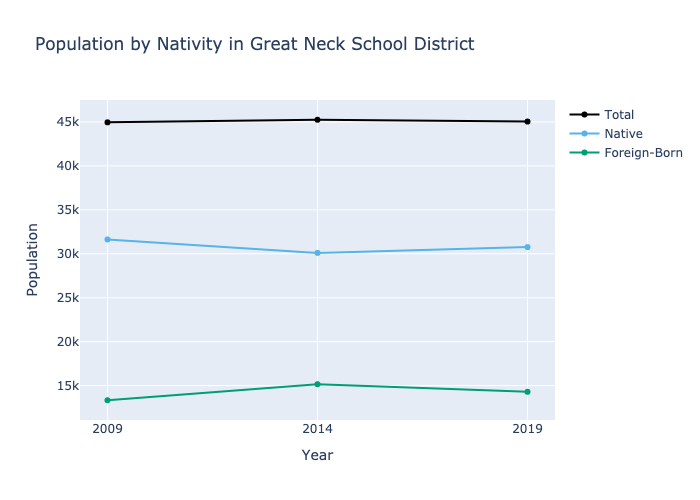

In [9]:
from censusdis.datasets import ACS5
from censusdis.states import NY

from utils import download_multiyear, graph_multiyear, pct_change_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2009, 2014, 2019],
    group="B05012",
    prompt=False,
    state=NY,
    school_district_unified="12510",
)
print(df)
graph_multiyear(
    df=df,
    title="Population by Nativity in Great Neck School District",
    yaxis_title="Population"
)

A few things stand out about this graph: 
1. The total population appears to be relatively flat
1. The population of Native and Foreign-Born seem to move in opposite directions.

But it is hard to get a feel for how big these changes are, in part, because the Y-axis encompasses the total as well as the sub-categories. One way to address this is to convert the raw numbers to percent change.

   Total  Native  Foreign-Born  Year
0    NaN     NaN           NaN  2009
0    0.7    -4.8          13.7  2014
0   -0.5     2.2          -5.7  2019


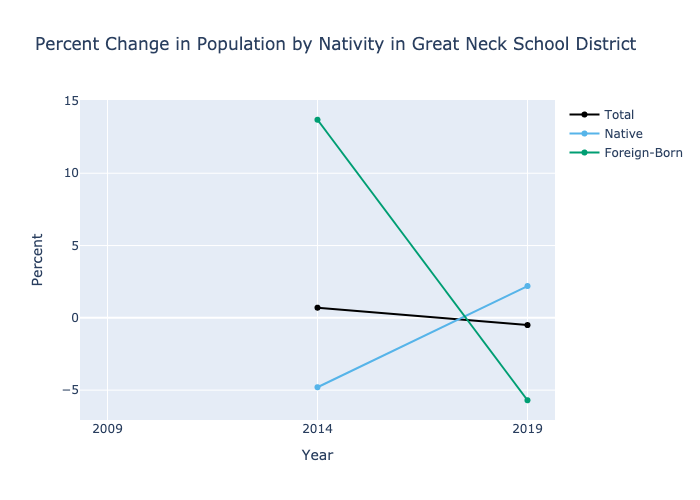

In [10]:
df_pct_change = pct_change_multiyear(df)

print(df_pct_change)

graph_multiyear(
    df_pct_change,
    "Percent Change in Population by Nativity in Great Neck School District",
    "Percent",
)

2009 is blank here because it is the first year in the 5-year ACS and so there is nothing to compare it to with respect to percent change. The 14% increase in the Foreign-Born population between 2009 and 2014 is much larer than I expected. And to see it followed by a 6% decrease the following 5 years was equally surprising. Similarly, I was surprised by the large fluctuation in percent-change from the Native population (-5% to 2%). Like in the graph for raw counts, the total population stayed relatively flat.

### Percent Foreign-Born

Here is how we can graph the percentage of the population that was Foreign-Born in each of the last 3 reporting periods.

   Total  Native  Foreign-Born  Year  Percent Foreign-Born
0  44953   31623         13330  2009                  29.7
0  45249   30096         15153  2014                  33.5
0  45044   30755         14289  2019                  31.7


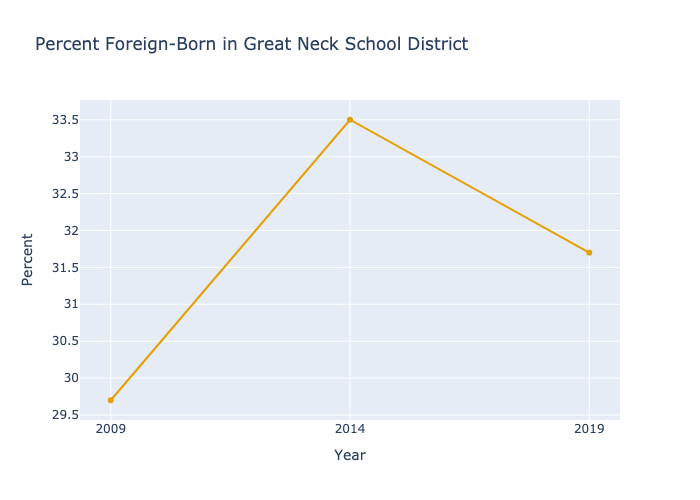

In [12]:
df_percent_foreign = df.copy()
df_percent_foreign["Percent Foreign-Born"] = (
    df["Foreign-Born"] / df["Total"] * 100
).round(1)

print(df_percent_foreign)
graph_multiyear(
    df_percent_foreign,
    "Percent Foreign-Born in Great Neck School District",
    "Percent",
    ["Percent Foreign-Born"],
)

So the Percent Foreign-Born in Great Neck Union Free School District has varied within a fairly small range over the last decade, despite the large fluctuations we saw earlier in Percent Change. It peaked in 2014. 